<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/Logistic-Regression/Dry_Bean_Classification_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dry Bean Classification using Logostic Regression

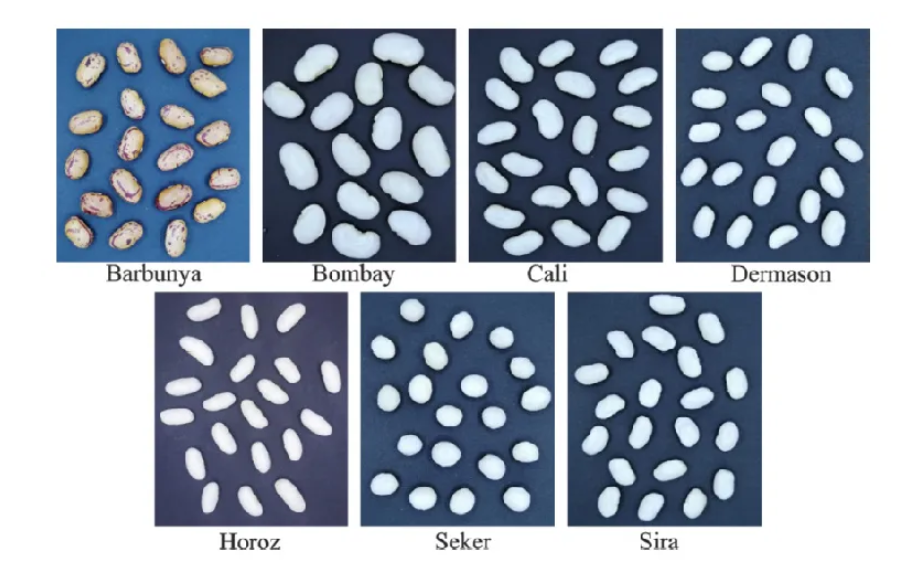

Context :

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Objective :

To develop a logistic regression model that can accurately classify seven different types of dry beans based on 16 extracted features (12 dimensions and 4 shape forms) derived from high-resolution images. This model aims to achieve uniform seed classification by leveraging the relationships between bean features and their respective classes.

Data Dictionary :

Area : The area of the bean in pixels.

Perimeter : The perimeter of the bean in pixels.

MajorAxisLength : The length of the major axis of the bean in pixels.

MinorAxisLength The length of the minor axis of the bean in pixels.

AspectRatio : The aspect ratio of the bean, which is the ratio of the major axis length to the minor axis length.

Eccentricity : The eccentricity of the bean, which is a measure of how elongated the bean is.

ConvexArea : The area of the smallest convex polygon that encloses the bean in pixels.

EquivDiameter : The diameter of a circle with the same area as the bean in pixels.

Extent : The ratio of the area of the bean to the area of the bounding box that encloses the bean.

Solidity : The ratio of the area of the bean to the area of its convex hull.

roundness : A measure of how round the bean is.

Compactness : A measure of how compact the bean is.

ShapeFactor1 : A shape factor that is calculated as the ratio of the area of the bean to the square of its perimeter.

ShapeFactor2 : A shape factor that is calculated as the ratio of the area of the bean to the product of its major and minor axis lengths.

ShapeFactor3 : A shape factor that is calculated as the ratio of the square of the minor axis length to the area of the bean.

ShapeFactor4 : A shape factor that is calculated as the ratio of the perimeter of the bean to the square root of its area.

Class The type of bean (e.g., Seker, Bombay, Cali, Barbunya, Sira).

In [21]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df=pd.read_csv('/content/Dry_Bean_Dataset.csv')

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
#Checking the shape
df.shape

(13611, 17)

**There are 13611 rows and 17 columns in the dataset.**

In [5]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

**Observations:**

* All columns has numerical data type except class column, as expected.
* The most of the column names are in Pascal case, but the Roundness column is in lowercase. The Aspect Ratio column is misspelled as well.  

In [7]:
# Rename the columns into title case format for readability
df.rename(columns = {'MajorAxisLength':'Major Axis Length', 'MinorAxisLength':'Minor Axis Length',
                        'AspectRation':'Aspect Ratio', 'ConvexArea':'Convex Area',
                        'EquivDiameter':'Equivalent Diameter','roundness':'Roundness',
                        'ShapeFactor1':'Shape Factor 1', 'ShapeFactor2':'Shape Factor 2',
                        'ShapeFactor3':'Shape Factor 3', 'ShapeFactor4':'Shape Factor 4'},
                       inplace = True)
df.columns

Index(['Area', 'Perimeter', 'Major Axis Length', 'Minor Axis Length',
       'Aspect Ratio', 'Eccentricity', 'Convex Area', 'Equivalent Diameter',
       'Extent', 'Solidity', 'Roundness', 'Compactness', 'Shape Factor 1',
       'Shape Factor 2', 'Shape Factor 3', 'Shape Factor 4', 'Class'],
      dtype='object')

**Note:**

Standardizing the name format of the columns and correcting misspellings not only enhances the readability of the table but also eases the data visualization process later on.

In [9]:
#Checking null values
df.isnull().sum()

,0
Area,0
Perimeter,0
Major Axis Length,0
Minor Axis Length,0
Aspect Ratio,0
Eccentricity,0
Convex Area,0
Equivalent Diameter,0
Extent,0
Solidity,0


**There are no null values in the dataset**

In [11]:
#Checking target column
df['Class'].value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


<Axes: xlabel='Class', ylabel='count'>

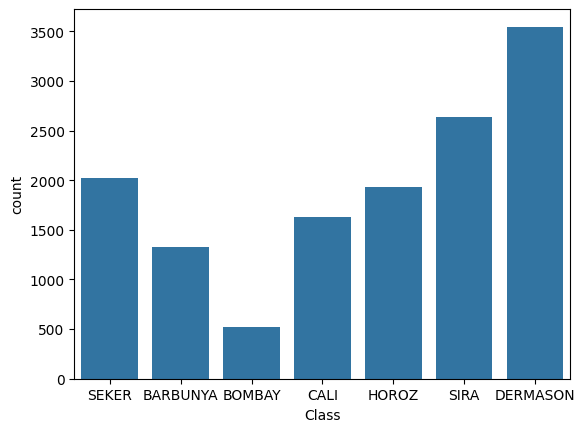

In [12]:
#plot the class column
sns.countplot(x='Class',data=df)

**Observation:**

* We can observe that highest no. of Beans are DERMASON and lowest are BOMBAY

In [13]:
#Checking Summary Statistics
df.describe()

,Area,Perimeter,Major Axis Length,Minor Axis Length,Aspect Ratio,Eccentricity,Convex Area,Equivalent Diameter,Extent,Solidity,Roundness,Compactness,Shape Factor 1,Shape Factor 2,Shape Factor 3,Shape Factor 4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [16]:
#Segregating the input and output variable

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [17]:
#Splitting the data in to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [22]:
#Creating the Logistic Regression Model
model=LogisticRegression()

#Fitting the data
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
#Taking the Predictions from the model
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [24]:
#model Evaluation
print("Training Accuracy:",metrics.accuracy_score(y_train,y_train_pred))
print("Testing Accuracy:",metrics.accuracy_score(y_test,y_test_pred))

Training Accuracy: 0.924504041146216
Testing Accuracy: 0.9265515975027543


In [27]:
# Summarize the precision, recall, accuracy, and f1 score of the model
LR_report = metrics.classification_report(y_test_pred, y_test)
print(LR_report)

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.92      0.92       259
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.95      0.94       314
    DERMASON       0.90      0.92      0.91       656
       HOROZ       0.96      0.97      0.97       404
       SEKER       0.94      0.97      0.95       402
        SIRA       0.90      0.85      0.87       571

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



**Observations :**

**Model performance is good on both Training and Testing data**